---
title: 使用Numpy实现机器学习
---

表达式：$y=3x^2+2$<br/>
模型：$y=wx^2+b$<br/>
损失函数：$Loss=\frac{1}{2}\sum_{i=1}^{100}(wx^2_i+b-y_i)^2$<br/>
对损失函数求导：<br/>
$\frac{\partial Loss}{\partial w}=\sum_{i=1}^{100}(wx^2_i+b-y_i)^2x^2_i$<br/>
$\frac{\partial Loss}{\partial b}=\sum_{i=1}^{100}(wx^2_i+b-y_i)^2$<br/>
利用梯度下降法学习参数，学习率为:lr<br/>
$w_1-=lr*\frac{\partial Loss}{\partial w}$<br/>
$b_1-=lr*\frac{\partial Loss}{\partial b}$


In [4]:
import numpy as np
from matplotlib import pyplot as plt

### 1.生成训练数据

In [5]:

#设置随机种子，生成同一份数据
np.random.seed(100)
x = np.linspace(-1, 1, 100).reshape(100, 1)
# y在真实值上增加噪声
y = 3*np.power(x, 2)+2+0.2*np.random.rand(x.size).reshape(100, 1)

### 2.查看x,y分布

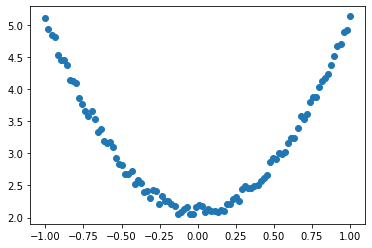

In [6]:
plt.scatter(x, y)
plt.show()

### 3.初始化权重参数

In [12]:
# 随即初始化参数
w1 = np.random.rand(1, 1)
b1 = np.random.rand(1, 1)

### 4.求解模型

In [8]:
lr = 0.001
for i in range(800):
    # 前向传播
    y_pred = np.power(x, 2)*w1+b1
    # 定义损失函数
    loss = 0.5 * (y_pred-y)**2
    # print(loss)
    # 对各维度求和
    loss = loss.sum()
    # 计算梯度(求导)
    grad_w = np.sum((y_pred-y)*np.power(x, 2))
    grad_b = np.sum((y_pred-y))
    # 使用梯度下降法，使得loss最小
    w1 -= lr*grad_w
    b1 -= lr*grad_b

### 5.结果可视化

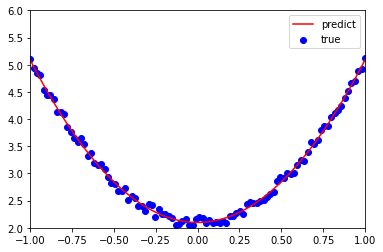

[[2.98927619]] [[2.09818307]]


In [10]:
plt.plot(x, y_pred, 'r-', label='predict')
plt.scatter(x, y, color='blue', marker='o', label='true')
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()
# 预测值
print(w1, b1)